In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kulsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kulsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kulsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv('spam.csv')
data['Category'] = np.where(data['Category'] == 'spam', 1, 0)

In [5]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text.lower())

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    # stemmer = PorterStemmer()
    # words = [stemmer.stem(word) for word in words]

    # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(word) for word in words]

    # Joining the processed words back into a text
    return ' '.join(words)

In [7]:
data['Message'] = data['Message'].apply(preprocess_text)

In [8]:
data

,Category,Message
0,0,"go jurong point , crazy .. available bugis n g..."
1,0,ok lar ... joking wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,"nah n't think goes usf , lives around though"
...,...,...
5567,1,2nd time tried 2 contact u. u £750 pound prize...
5568,0,ü b going esplanade fr home ?
5569,0,"pity , * mood . ... suggestions ?"
5570,0,guy bitching acted like 'd interested buying s...


In [9]:
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [11]:
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [12]:
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
140/140 [==============================] - 3s 6ms/step - loss: 0.3134 - accuracy: 0.8833
Epoch 2/5
140/140 [==============================] - 1s 6ms/step - loss: 0.0540 - accuracy: 0.9838
Epoch 3/5
140/140 [==============================] - 1s 7ms/step - loss: 0.0179 - accuracy: 0.9946
Epoch 4/5
140/140 [==============================] - 1s 6ms/step - loss: 0.0073 - accuracy: 0.9984
Epoch 5/5
140/140 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.9996


In [14]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

35/35 [==============================] - 0s 3ms/step


In [15]:
DL_TFIDF_Accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {DL_TFIDF_Accuracy:.4f}")

Test Accuracy: 0.9883


In [16]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.97      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[962   4]
 [  9 140]]


In [17]:
new_emails = ["Congrats! You've won a prize! Please call our customer service representative", "Important meeting tomorrow."]
new_email_sequences = vectorizer.transform(new_emails).toarray()
predictions = model.predict(new_email_sequences)

1/1 [==============================] - 0s 45ms/step


In [18]:
for i, email in enumerate(new_emails):
    spam_probability = predictions[i][0]
    if spam_probability > 0.5:
        print(f"'{email}' is spam with probability {spam_probability:.2f}")
    else:
        print(f"'{email}' is not spam with probability {1 - spam_probability:.2f}")

'Congrats! You've won a prize! Please call our customer service representative' is spam with probability 0.94
'Important meeting tomorrow.' is not spam with probability 1.00


In [19]:
data = pd.read_csv('spam.csv')
data['Category'] = np.where(data['Category'] == 'spam', 1, 0)

In [20]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
data['Message'] = data['Message'].apply(preprocess_text)

In [22]:
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [24]:
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [25]:
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
140/140 [==============================] - 2s 8ms/step - loss: 0.2519 - accuracy: 0.9174
Epoch 2/5
140/140 [==============================] - 1s 8ms/step - loss: 0.0391 - accuracy: 0.9888
Epoch 3/5
140/140 [==============================] - 1s 8ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 4/5
140/140 [==============================] - 1s 9ms/step - loss: 0.0073 - accuracy: 0.9978
Epoch 5/5
140/140 [==============================] - 1s 8ms/step - loss: 0.0031 - accuracy: 0.9993


In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

35/35 [==============================] - 0s 4ms/step


In [28]:
DL_CT_Accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {DL_CT_Accuracy:.4f}")

Test Accuracy: 0.9910


In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

[[966   0]
 [ 10 139]]


In [30]:
new_emails = ["Congrats! You've won a prize! Please call our customer service representative", "Important meeting tomorrow."]
new_email_sequences = vectorizer.transform(new_emails).toarray()
predictions = model.predict(new_email_sequences)

1/1 [==============================] - 0s 59ms/step


In [31]:
for i, email in enumerate(new_emails):
    spam_probability = predictions[i][0]
    if spam_probability > 0.5:
        print(f"'{email}' is spam with probability {spam_probability:.2f}")
    else:
        print(f"'{email}' is not spam with probability {1 - spam_probability:.2f}")

'Congrats! You've won a prize! Please call our customer service representative' is spam with probability 0.98
'Important meeting tomorrow.' is not spam with probability 1.00


In [32]:
from sklearn.svm import SVC
from transformers import BertTokenizer, TFBertForSequenceClassification

In [33]:
# Load the data
data = pd.read_csv('spam.csv')
data['Category'] = np.where(data['Category'] == 'spam', 1, 0)

In [34]:
# Preprocess the text
data['Message'] = data['Message'].apply(preprocess_text)

In [35]:
# Split the data
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# SVM using Count Vectorizer
vectorizer_svm_count = CountVectorizer()
X_train_svm_count = vectorizer_svm_count.fit_transform(X_train)
X_test_svm_count = vectorizer_svm_count.transform(X_test)

In [37]:
svm_model_count = SVC(kernel='linear')
svm_model_count.fit(X_train_svm_count, y_train)
y_pred_svm_count = svm_model_count.predict(X_test_svm_count)

In [38]:
SVM_Count_Accuracy = accuracy_score(y_test, y_pred_svm_count)
print(f"SVM with Count Vectorizer Test Accuracy: {SVM_Count_Accuracy:.4f}")

SVM with Count Vectorizer Test Accuracy: 0.9821


In [39]:
# SVM using TF-IDF
vectorizer_svm_tfidf = TfidfVectorizer()
X_train_svm_tfidf = vectorizer_svm_tfidf.fit_transform(X_train)
X_test_svm_tfidf = vectorizer_svm_tfidf.transform(X_test)

In [40]:
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_svm_tfidf, y_train)
y_pred_svm_tfidf = svm_model_tfidf.predict(X_test_svm_tfidf)

In [41]:
SVM_TFIDF_Accuracy = accuracy_score(y_test, y_pred_svm_tfidf)
print(f"SVM with TF-IDF Test Accuracy: {SVM_TFIDF_Accuracy:.4f}")

SVM with TF-IDF Test Accuracy: 0.9910


In [42]:
# Load the data
data = pd.read_csv('spam.csv')
data['Category'] = np.where(data['Category'] == 'spam', 1, 0)

In [43]:
# Preprocess the text
data['Message'] = data['Message'].apply(preprocess_text)

In [44]:
# Split the data
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
data

,Category,Message
0,0,"go jurong point , crazy .. available bugis n g..."
1,0,ok lar ... joking wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,"nah n't think goes usf , lives around though"
...,...,...
5567,1,2nd time tried 2 contact u. u £750 pound prize...
5568,0,ü b going esplanade fr home ?
5569,0,"pity , * mood . ... suggestions ?"
5570,0,guy bitching acted like 'd interested buying s...


In [46]:
# BERT using TensorFlow
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
# max_sequence_length: Maximum length of sentences or messages
max_sequence_length = max(len(sentence.split()) for sentence in data["Message"])
print("Max Sequence Length:", max_sequence_length)

Max Sequence Length: 203


In [48]:
# Tokenize and prepare data
X_train_bert = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors='tf', max_length=max_sequence_length)
X_test_bert = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors='tf', max_length=max_sequence_length)

In [49]:
import tensorflow as tf

# Convert labels to TensorFlow tensors
y_train_bert = tf.convert_to_tensor(y_train)
y_test_bert = tf.convert_to_tensor(y_test)

In [50]:
# Convert BatchEncoding to a dictionary
X_train_bert_dict = {key: X_train_bert[key] for key in X_train_bert}
X_test_bert_dict = {key: X_test_bert[key] for key in X_test_bert}

In [51]:
# Build and compile the model
model_bert.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model_bert.fit(X_train_bert_dict, y_train_bert, epochs=5, batch_size=24)

Epoch 1/5
  1/186 [..............................] - ETA: 5:10:04 - loss: 10.8474 - accuracy: 0.2083

KeyboardInterrupt: ignored

In [ ]:
model_bert.save("model_bert.h5")

In [ ]:
from keras.models import load_model

model_bert = load_model("model_bert.h5")

In [ ]:
# Evaluate the model
bert_predictions = model_bert.predict(X_test_bert_dict)
y_pred_bert = tf.argmax(bert_predictions.logits, axis=1)

In [ ]:
BERT_Accuracy = accuracy_score(y_test, y_pred_bert)
print(f"BERT Test Accuracy: {BERT_Accuracy:.4f}")

In [52]:
# Load the data
data = pd.read_csv('spam.csv')
data['Category'] = np.where(data['Category'] == 'spam', 1, 0)

In [53]:
# Preprocess the text
data['Message'] = data['Message'].apply(preprocess_text)

In [54]:
# Split the data
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Assuming 'X' is your dataset
all_words = ' '.join(data["Message"])
unique_words = set(all_words.split())

# max_words: Total unique words in the dataset
max_words = len(unique_words)
print("Max Words:", max_words)

Max Words: 9296


In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_rnn = Tokenizer(num_words=max_words)
tokenizer_rnn.fit_on_texts(X_train)

In [57]:
X_train_rnn = tokenizer_rnn.texts_to_sequences(X_train)
X_test_rnn = tokenizer_rnn.texts_to_sequences(X_test)

In [58]:
X_train_rnn = pad_sequences(X_train_rnn, maxlen=max_sequence_length)
X_test_rnn = pad_sequences(X_test_rnn, maxlen=max_sequence_length)

In [59]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_sequence_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(1, activation='sigmoid'))

In [60]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model_rnn.fit(X_train_rnn, y_train, epochs=5, batch_size=32)

Epoch 1/5
140/140 [==============================] - 10s 31ms/step - loss: 0.1838 - accuracy: 0.9336
Epoch 2/5
140/140 [==============================] - 4s 30ms/step - loss: 0.0277 - accuracy: 0.9924
Epoch 3/5
140/140 [==============================] - 4s 30ms/step - loss: 0.0096 - accuracy: 0.9984
Epoch 4/5
140/140 [==============================] - 4s 30ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
140/140 [==============================] - 4s 29ms/step - loss: 0.0023 - accuracy: 0.9993


In [62]:
# Evaluate the RNN model
RNN_Accuracy = model_rnn.evaluate(X_test_rnn, y_test)[1]
print(f"RNN Test Accuracy: {RNN_Accuracy:.4f}")

35/35 [==============================] - 1s 14ms/step - loss: 0.0518 - accuracy: 0.9910
RNN Test Accuracy: 0.9910


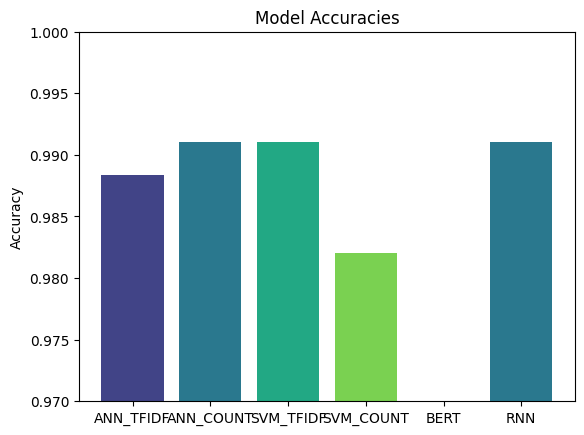

In [67]:
import matplotlib.pyplot as plt

# Assuming you have the accuracies defined earlier
models = ['ANN_TFIDF', 'ANN_COUNT', 'SVM_TFIDF', 'SVM_COUNT', "BERT", "RNN"]
accuracies = [DL_TFIDF_Accuracy, DL_CT_Accuracy, SVM_TFIDF_Accuracy, SVM_Count_Accuracy, 0, RNN_Accuracy]

plt.bar(models, accuracies, color=plt.cm.viridis([0.2, 0.4, 0.6, 0.8]))  # Using viridis colormap
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.97, 1)  # Set y-axis limit to represent accuracy percentage
plt.show()


In [82]:
# Assuming you have the accuracies defined earlier
accuracies = {
    'ANN_TFIDF': DL_TFIDF_Accuracy, 
    'ANN_COUNT': DL_CT_Accuracy, 
    'SVM_TFIDF': SVM_TFIDF_Accuracy, 
    'SVM_COUNT': SVM_Count_Accuracy, 
    "BERT": 0, 
    "RNN": RNN_Accuracy
}

best_model = max(accuracies, key=lambda k: accuracies[k])
best_accuracy = accuracies[best_model]

print(f"The best model is '{best_model}' with an accuracy of {best_accuracy}")


The best model is 'RNN' with an accuracy of 0.9910314083099365
